## Pandas

### Starting a file: Reading and getting information

In [4]:
import pandas as pd

#Make a list with pandas
our_list = pd.Series(["one","two","three"])
print(our_list)

#Make a dataframe out of series
our_dataframe = pd.DataFrame({"Colom name 1": our_list, "Colom name 2": "Check"})
print(our_dataframe)

#List out all the column names
car_sales_n.columns.values.tolist()

#Lower the strings of a column
car_sales_n["Make"] = car_sales_n["Make"].str.lower()

#Changing the title of a column
car_sales_n = car_sales_n.rename(columns={"Odometer (KM)" : "Odometer (Miles)"})


0      one
1      two
2    three
dtype: object
  Colom name 1 Colom name 2
0          one        Check
1          two        Check
2        three        Check


#### Importing and exporting files


In [5]:
#Make pandas reed a file
car_sales = pd.read_csv("7.1 car-sales.csv")

#Export a dataframe
car_sales.to_csv("New File Name.csv")

#### Viewing and datatypes

In [21]:
#Show the type of data
data_types = car_sales.dtypes
print(data_types)

#Show the column in a list
show_columns = car_sales.columns
print(show_columns)

#Show the index range
indexing = car_sales.index
print(indexing)

#Statistical information on the numerical columns
statistics = car_sales.describe()
print(statistics)

#Length of the dataframe
length = len(car_sales)
print(length)

#Show the bottom 5 rows of the car sales DataFrame
car_sales.tail(5)

#Show range, index, data types and memory usage
info = car_sales.info()
print(info)



Make              object
Colour            object
Odometer (KM)      int64
Doors              int64
Price             object
Fuel             float64
dtype: object
Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price', 'Fuel'], dtype='object')
RangeIndex(start=0, stop=10, step=1)
       Odometer (KM)      Doors       Fuel
count      10.000000  10.000000  10.000000
mean    78601.400000   4.000000   7.650000
std     61983.471735   0.471405   2.042466
min     11179.000000   3.000000   3.400000
25%     35836.250000   4.000000   6.825000
50%     57369.000000   4.000000   8.250000
75%     96384.500000   4.000000   9.100000
max    213095.000000   5.000000   9.900000
10


,Make,Colour,Odometer (KM),Doors,Price,Fuel
5,Toyota,Green,99213,4,"$4,500.00",8.8
6,Honda,Blue,45698,4,"$7,500.00",6.6
7,Honda,Blue,54738,4,"$7,000.00",7.7
8,Toyota,White,60000,4,"$6,250.00",8.8
9,Nissan,White,31600,4,"$9,700.00",9.9


#### Statistical functions on lists

In [18]:
car_prices = pd.Series([1230, 5600, 600, 8901])
print(car_prices.mean())
print(car_prices.sum())
print(car_prices.min())

4082.75
16331
600


### Working with specific variables

#### Location and indexing

In [25]:
#Show the data for an index
loc_sample = car_sales.loc[2]
print(loc_sample)

#Show the data for a position
iloc_sample = car_sales.iloc[3]
print(iloc_sample)




Make                Toyota
Colour                Blue
Odometer (KM)        32549
Doors                    3
Price            $7,000.00
Name: 2, dtype: object
Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object
     Make Colour  Odometer (KM)  Doors      Price
0  Toyota  White         150043      4  $4,000.00
1   Honda    Red          87899      4  $5,000.00


In [26]:
#Show the data for a row
row_iloc = car_sales.iloc[:2] #Until the second position
print(row_iloc)

     Make Colour  Odometer (KM)  Doors      Price
0  Toyota  White         150043      4  $4,000.00
1   Honda    Red          87899      4  $5,000.00


In [6]:
#View only a column
only_column = car_sales["Colour"]
print(only_column)

#Different method same function
car_sales.Make #Only works without spaces in title

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object


0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [30]:
#show a specific column but also with a specific variable
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [23]:
# Select the rows with over 100,000 kilometers on the Odometer

for i in car_sales["Odometer (KM)"] :
    if i > 100000:
        print(car_sales[car_sales["Odometer (KM)"] == i])

     Make Colour  Odometer (KM)  Doors      Price  Fuel
0  Toyota  White         150043      4  $4,000.00   7.5
     Make Colour  Odometer (KM)  Doors      Price  Fuel
4  Nissan  White         213095      4  $3,500.00   9.2


#### Grouping, crosstab, lambda and visualizing

In [31]:
#Crostab: Comparing two columns
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [34]:
#Grouping a column
car_sales.groupby(["Make"]).mean()

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [ ]:
#Apply the function lambda to a column
car_sales_n["Odometer (KM)"] = car_sales_n["Odometer (KM)"].apply(lambda x: x / 1.6)

#Use the function .apply() to apply a function
#Lambda is a anonymous function. Give this a name, in our case x
#For all the data lambda will do what you want it to do to x after :
#Therefore now all our datapoint in the column will be devided by 1.6

car_sales_n.head()

<AxesSubplot:>

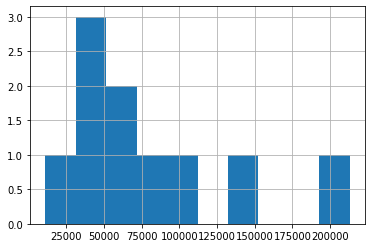

In [36]:
#Making a histogram
car_sales["Odometer (KM)"].hist()

### Converting and working with missing data

#### Converting data

In [48]:
#Converting object to integer
car_sales["Price"] = car_sales["Price"].replace("[\$\,\.]","").astype(int)
#This converts the column Price, by replacing the $ , and . with nothing, and then changing the datatype to a int

car_sales.head()

#Different methods
car_sales["Price"] = car_sales["Price"].replace('[\$\,\.]', '', regex=True).astype(int)
car_sales["Price"] = car_sales["Price"].str.replace("[\$\,\.]","").astype(int)



,Make,Colour,Odometer (KM),Doors,Price,Fuel
0,Toyota,White,150043,4,4000,7.5
1,Honda,Red,87899,4,5000,9.3
2,Toyota,Blue,32549,3,7000,5.3
3,BMW,Black,11179,5,22000,3.4
4,Nissan,White,213095,4,3500,9.2


In [45]:
#We don't want to include the cents, so we quickly fix that:
car_sales["Price"] = car_sales["Price"] / 100

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Fuel
0,Toyota,White,150043,4,4000.0,7.5
1,Honda,Red,87899,4,5000.0,9.3
2,Toyota,Blue,32549,3,7000.0,5.3
3,BMW,Black,11179,5,22000.0,3.4
4,Nissan,White,213095,4,3500.0,9.2


#### Working with missing data

In [5]:
#Making a new data frame
missing_data_car_sales = pd.read_csv("car-sales-missing-data.csv")

missing_data_car_sales.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [10]:
#Fillig in the missing values with mean
missing_data_car_sales["Odometer"] = missing_data_car_sales["Odometer"].fillna(missing_data_car_sales["Odometer"].mean())

#Using inplace to shorten data
missing_data_car_sales["Odometer"].fillna(missing_data_car_sales["Odometer"].mean(), inplace = True)
#this sets our manipulation in place in our data frame for us

missing_data_car_sales.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"


In [61]:
#Getting rid of missing values
missing_data_car_sales.dropna(inplace = True)


### Adding and removing data

#### Adding columns from series and lists

In [11]:
#Column from series
seats_column = pd.Series([5, 5, 4, 4, 4])
car_sales["Seats"] = seats_column
#always adds to the right

#Filling in all the missing data
car_sales["Seats"].fillna(5, inplace=True)

#Column from list
fuel_economy = [7.5, 9.3, 5.3, 3.4, 9.2, 8.8, 6.6, 7.7, 8.8, 9.9]
car_sales["Fuel"] = fuel_economy
#This has to be the same length as number of indexes

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel
0,Toyota,White,150043,4,"$4,000.00",5.0,7.5
1,Honda,Red,87899,4,"$5,000.00",5.0,9.3
2,Toyota,Blue,32549,3,"$7,000.00",4.0,5.3
3,BMW,Black,11179,5,"$22,000.00",4.0,3.4
4,Nissan,White,213095,4,"$3,500.00",4.0,9.2


#### Loosing columns

In [12]:
#How to loose a column
car_sales = car_sales.drop("Seats", axis = 1)
#put in axis= 1 for columns and axis=0 for rows

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price,Fuel
0,Toyota,White,150043,4,"$4,000.00",7.5
1,Honda,Red,87899,4,"$5,000.00",9.3
2,Toyota,Blue,32549,3,"$7,000.00",5.3
3,BMW,Black,11179,5,"$22,000.00",3.4
4,Nissan,White,213095,4,"$3,500.00",9.2


#### Loosing rows (with conditions)

In [7]:
#Remove a row
car_sales_n.drop(3, axis = 0)

#Drop a range of rows
car_sales_n.drop([2:4], axis = 0)

#Dropping row with condition
#Do not forget to get the indexi in order to remove
car_sales_n.drop(car_sales_n[(car_sales_n["Colour"] == "White")].index, axis = 0)

SyntaxError: invalid syntax (Temp/ipykernel_17864/482458518.py, line 5)

### Shuffling data

In [15]:
#How to shuffle the rows
car_sales_shuffle = car_sales_n.sample(frac = 1) #Use the 1 to randomize 100% of the data

car_sales_shuffle.head()

,Make,Colour,Odometer (KM),Doors,Price
3,BMW,Black,11179,5,"$22,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"
1,Honda,Red,87899,4,"$5,000.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [16]:
#How to reset from shuffle
#And remove the old indexes with (drop=True)
car_sales_shuffle.reset_index(drop=True)

,Make,Colour,Odometer (KM),Doors,Price
0,BMW,Black,11179,5,"$22,000.00"
1,Toyota,White,60000,4,"$6,250.00"
2,Nissan,White,31600,4,"$9,700.00"
3,Honda,Red,87899,4,"$5,000.00"
4,Honda,Blue,45698,4,"$7,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Toyota,White,150043,4,"$4,000.00"
7,Nissan,White,213095,4,"$3,500.00"
8,Honda,Blue,54738,4,"$7,000.00"
9,Toyota,Blue,32549,3,"$7,000.00"
